##Let's understand Images

Imagine you're a robot, and instead of seeing the world with eyes like humans, you "see" through a grid of tiny squares called pixels. Each pixel is like a tile on a giant mosaic. In a colored image, each pixel has three main ingredients: Red, Green, and Blue (RGB), just like how you mix colors in real life.

Here’s how the robot (or computer) thinks:

**Pixels are like LEGO blocks**: If you zoom in enough, every image looks like it’s made of tiny square blocks, called pixels. The more pixels you have, the more detailed the image is.

**RGB Magic**: Every pixel is made of three ingredients—Red, Green, and Blue. Each of these ingredients has a recipe, like how much red, green, or blue you need to make the right color.

**Example**: A pixel might have 255 red, 0 green, and 0 blue, which makes bright red!
Grayscale is like seeing in black and white: When the robot wants to make things simple, it removes the colors and only pays attention to how "bright" or "dark" each pixel is. This is called grayscale. Imagine a black-and-white filter where every pixel tells you if it’s closer to white (light) or black (dark).

**Matrix World**: The computer sees this pixel grid as a huge table full of numbers (like a spreadsheet). For a grayscale image, each pixel has a value from 0 (black) to 255 (white). For a color image, each pixel has 3 numbers (for Red, Green, and Blue). So, your lovely selfie is really just a big grid of numbers!

**Processing the image**: When you ask the computer to do something with the image, like find an object, it’s like asking it to look at the numbers in the matrix and detect patterns. For example, when it detects edges, it looks for places where the numbers change quickly, like going from 255 (white) to 0 (black).

So, in short:

A computer sees images as a grid of numbers (pixels).
It mixes Red, Green, and Blue like a color palette for colored images.
It can convert everything to grayscale, which is just different shades of brightness.
And finally, it uses math to understand patterns like shapes, edges, and colors in the image.

### Let's work with an image

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
#upload an image to the file directory and provide it's path
# Read the image from file
image = cv2.imread('/content/rm.jpg')
image

array([[[ 38,  17,  19],
        [ 36,  15,  17],
        [ 38,  17,  19],
        ...,
        [ 39,  18,  20],
        [ 42,  22,  21],
        [ 44,  25,  20]],

       [[ 39,  18,  20],
        [ 39,  18,  20],
        [ 38,  17,  19],
        ...,
        [ 46,  25,  27],
        [ 42,  22,  21],
        [ 40,  21,  16]],

       [[ 37,  16,  18],
        [ 40,  19,  21],
        [ 42,  21,  23],
        ...,
        [ 46,  25,  27],
        [ 42,  23,  20],
        [ 42,  23,  18]],

       ...,

       [[ 39, 120, 231],
        [ 37, 119, 228],
        [ 34, 117, 226],
        ...,
        [ 35, 104, 215],
        [ 33, 104, 215],
        [ 34, 105, 216]],

       [[ 38, 117, 228],
        [ 33, 115, 224],
        [ 32, 114, 223],
        ...,
        [ 33, 102, 213],
        [ 33, 104, 215],
        [ 36, 107, 218]],

       [[ 35, 114, 225],
        [ 33, 112, 222],
        [ 32, 114, 223],
        ...,
        [ 32, 101, 212],
        [ 36, 105, 216],
        [ 38, 109, 220]]

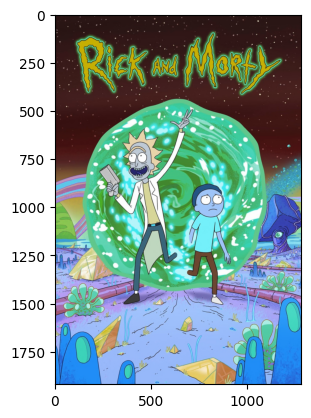

In [3]:
#this is my image
plt.imshow(image)

In [4]:
#check the shape of the image
image.shape

(1920, 1280, 3)

In [5]:
#image contains 3 channels (r,g,b) since it is a colored image.
#the array is a 3-d array with 3 channels of 1920*1280.

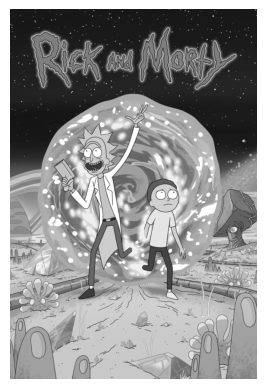

In [6]:
#converting the image to a grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   #cv2.COLOR_BGR2GRAY is a color conversion code used to convert an image from BGR (Blue, Green, Red) format to grayscale.

# Display the grayscale image using Matplotlib
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

In [7]:
gray_image.shape

(1920, 1280)

In [8]:
#the shape of the image is 1920*1280. This is a 2-d array as grayscale images has only one channel.

### conv

In [9]:
import numpy as np

In [28]:
image_path = "/content/bw image.jpg"
original_image = cv2.imread(image_path)
#let's convert the image into grayscale since we know how to handle such images
gray_image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)


Text(0.5, 1.0, '(429, 612, 3)')

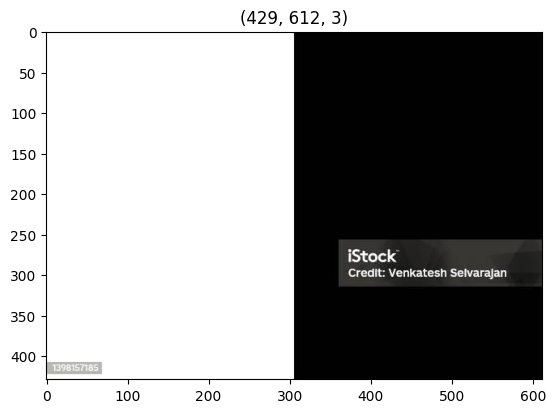

In [29]:
plt.imshow(original_image)
plt.title(original_image.shape)

Text(0.5, 1.0, '(429, 612)')

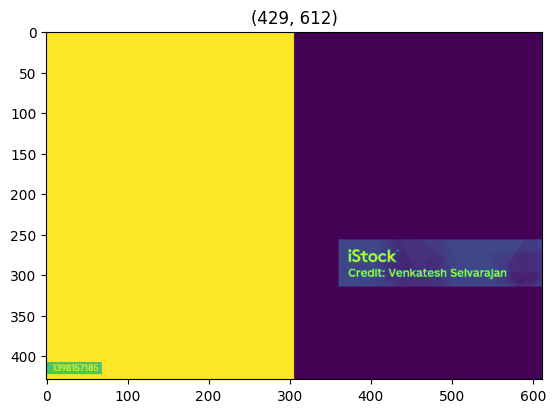

In [30]:
plt.imshow(gray_image)
plt.title(gray_image.shape)

In [31]:
#now this image might not look black and white exactly but it is a grayscale image and you can confirm it by checking it's shape
gray_image.shape

(429, 612)

In [32]:
filter_array = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])

In [33]:
#let's perform the convolution operation now!
#once we perform convolution on the gray_image with filter_array, the output array will have size of
# output size = input size - filter_size + 1
# gray_image shape = (429, 612)
# 429-3 + 1 = 427
# 612-3 + 1 = 610
#output image shape 427*610

In [34]:
#convolution from scratch
gray_image.shape

(429, 612)

In [35]:
rows,cols = gray_image.shape
rows,cols

(429, 612)

In [36]:
#shape of the filter (k = 3)
k = filter_array.shape[0]
k

3

In [37]:
output_array = np.zeros((rows-k+1,cols-k+1))
output_array.shape

(427, 610)

In [38]:
output_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
#let's iterate through original image to apply the convolution operation
for i in range(1,rows-1):
  for j in range(1,cols-1):
    region = gray_image[i-1:i+2,j-1:j+2]
    output_array[i-1,j-1] = np.sum(region*filter_array)


In [40]:
print(output_array)
print(output_array.shape)

[[  0.   0.   0. ...  -4.  -4.  32.]
 [  0.   0.   0. ...  -4.  -4.  32.]
 [  0.   0.   0. ...  -4.  -4.  32.]
 ...
 [  0.   0.   0. ...  -2. -12.  26.]
 [  0.   0.   0. ...  -1. -12.  26.]
 [  0.   0.   0. ...  -2. -13.  29.]]
(427, 610)


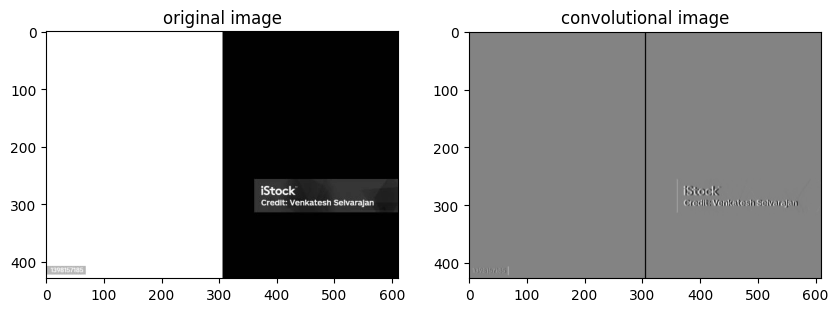

In [41]:
plt.figure(figsize=(10,5))

#original image
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(gray_image,cmap='gray')

#convolutional image
plt.subplot(1,2,2)
plt.title('convolutional image')
plt.imshow(output_array,cmap='gray')
#the blacj line in the right image indicates the edge of the original image

In [45]:
#let's use cv2 for convolution
output2 = cv2.filter2D(gray_image,-1,filter_array)
output2.shape


(429, 612)

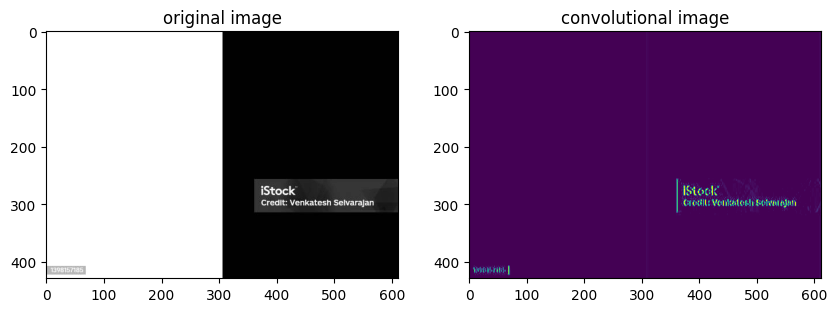

In [47]:
plt.figure(figsize=(10,5))

#original image
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(gray_image,cmap='gray')

#convolutional image
plt.subplot(1,2,2)
plt.title('convolutional image')
plt.imshow(output2)

In [ ]:
#if you observe the image closely you will see a very faint line right in the middle indicating the edge!